In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False, # excludes final classfication layer as we will add our own custom layer to classify the dogs
    input_shape=(224, 224, 3) # expect images to be resized to 224 x 224, 3 color channels
)

In [3]:
# the layers of the pre-trained model will not be updated during training
# only train the new layers that are added on top
base_model.trainable = False

In [4]:
# adding custom layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(), # reduces the dimensions of the feature maps
    layers.Dense(128, activation='relu'), # a fully connected layer with 128 units and a ReLU activation function
    layers.Dense(2, activation='softmax')  # 2 classes: Dog 1 and Dog 2
])

In [5]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# Preparing the Dataset Using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    os.path.abspath('./data/train/'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 220 images belonging to 2 classes.


In [8]:
model.fit(train_generator, epochs=10)

C:\Users\yenla\AppsByYen\GepperPinger\training\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7580 - loss: 0.4478  
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9658 - loss: 0.0915
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9688 - loss: 0.0766
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9945 - loss: 0.0351
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9982 - loss: 0.0186
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9825 - loss: 0.0234
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 0.0123
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 0.0051
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9951 - loss: 0.0071
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9890 - loss: 0.0107


In [24]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
    os.path.abspath('./data/test/'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 20 images belonging to 2 classes.


In [25]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0428
Test Loss: 0.042843692004680634
Test Accuracy: 1.0


In [11]:
model.save(os.path.join(os.path.abspath('./trained_models/'), 'dog_identifier.h5'))

In [32]:
class_names = list(test_generator.class_indices.keys())

# Get predictions
y_pred = model.predict(test_generator, verbose=1)
y_true = test_generator.classes  # Actual labels from the test generator
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted classes (not probabilities)

# Find incorrectly classified images
incorrect_predictions = np.where(y_pred_classes != y_true)[0]
correct_predictions = np.where(y_pred_classes == y_true)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


12


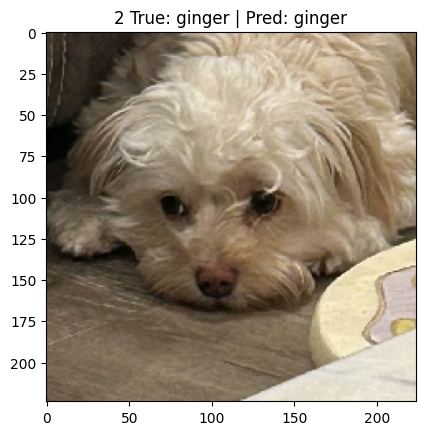

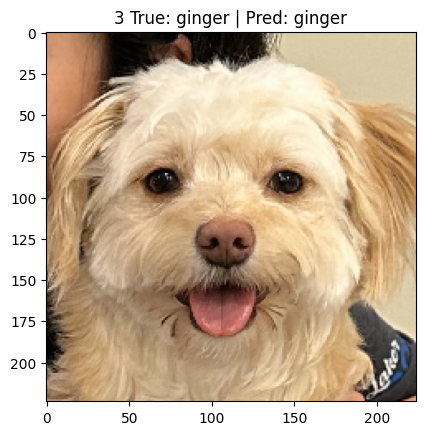

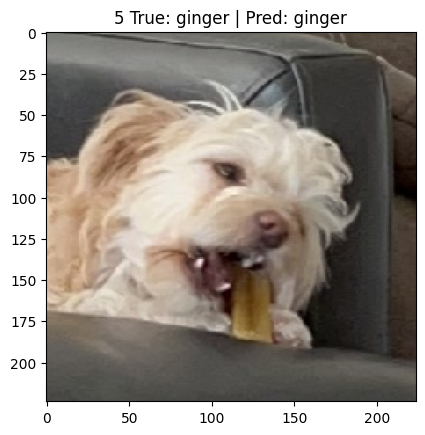

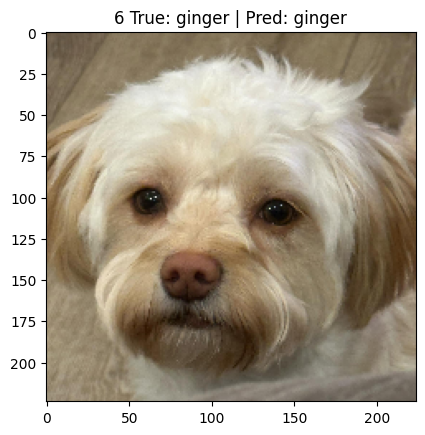

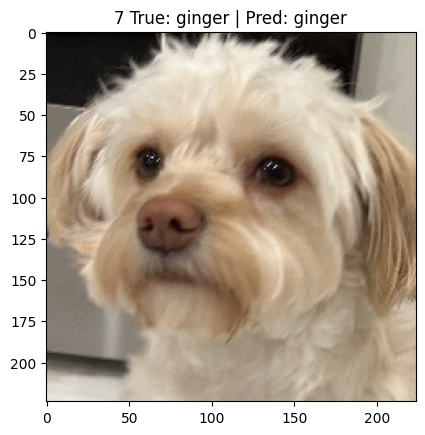

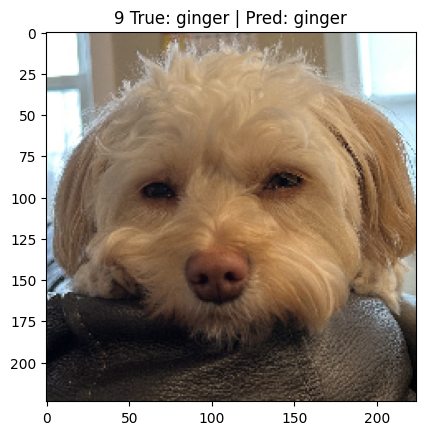

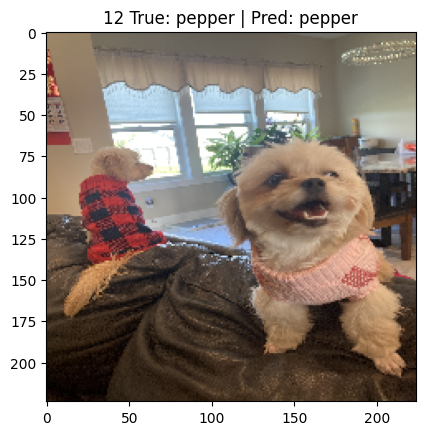

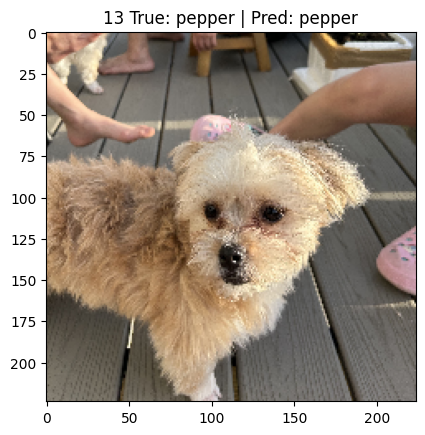

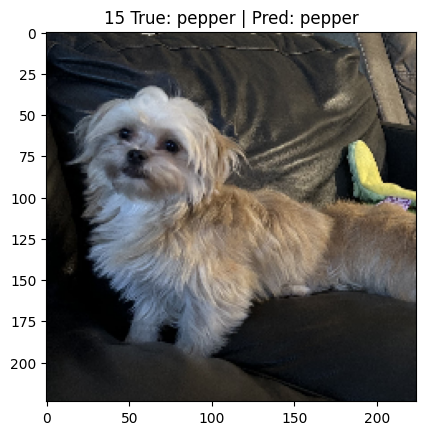

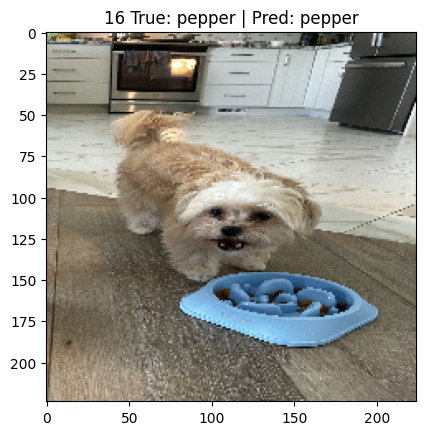

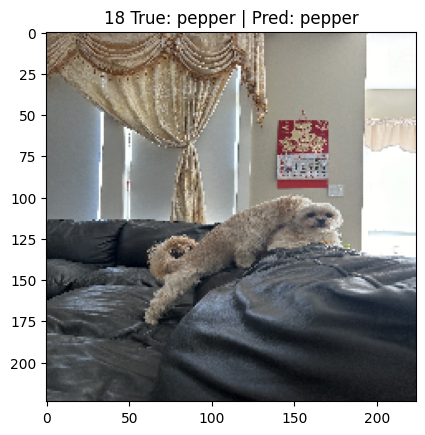

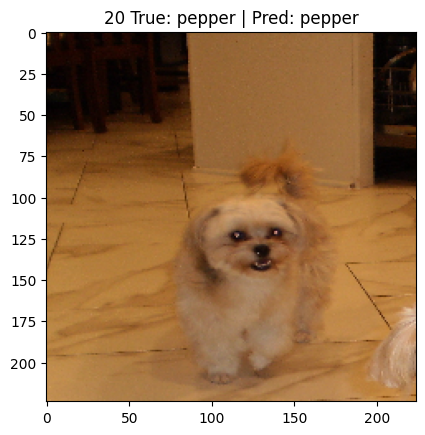

In [33]:
print(len(correct_predictions))

for idx in correct_predictions:
    # Get the image filename and label
    img_path = os.path.join(test_generator.directory, test_generator.filenames[idx])
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust to your image size
    true_label = y_true[idx]
    predicted_label = y_pred_classes[idx]
    
    # Print image, true label, and predicted label
    plt.imshow(img)
    plt.title(f"{idx+1} True: {class_names[true_label]} | Pred: {class_names[predicted_label]}")
    plt.show()

8


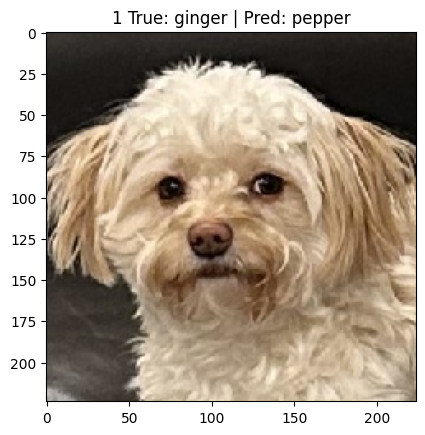

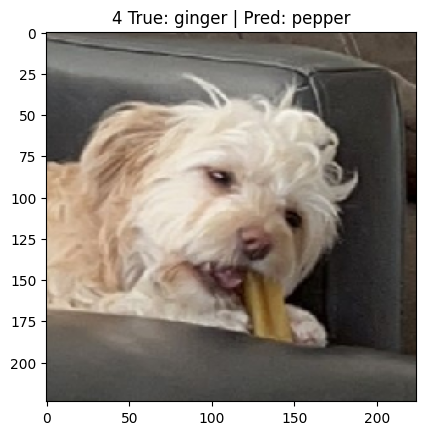

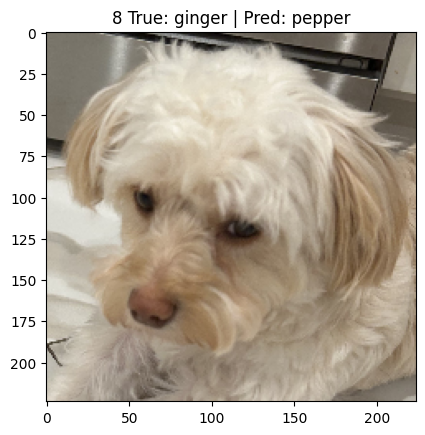

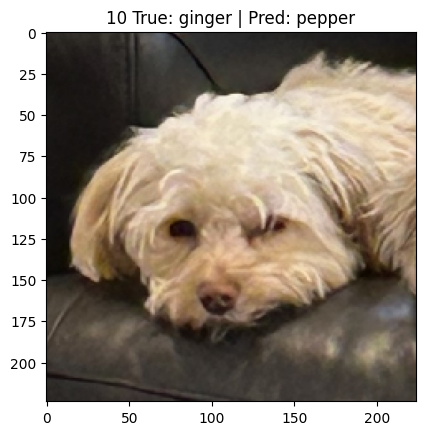

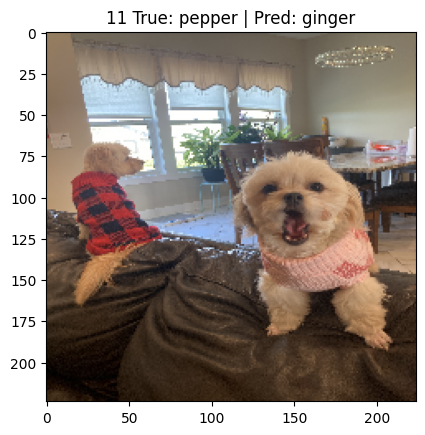

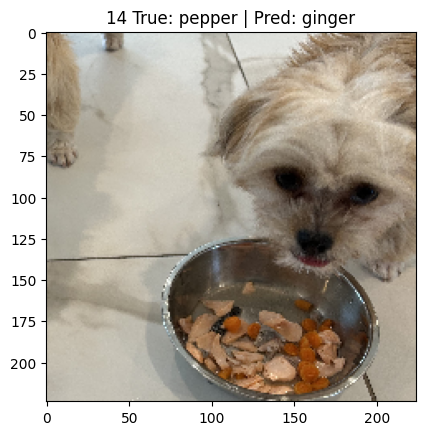

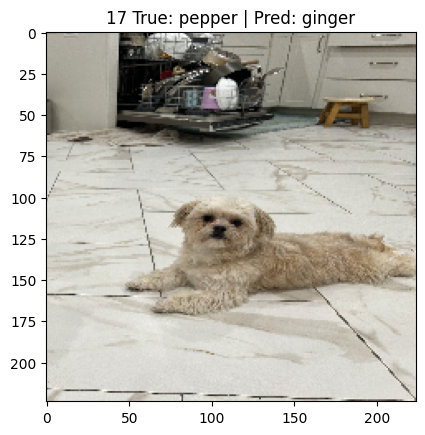

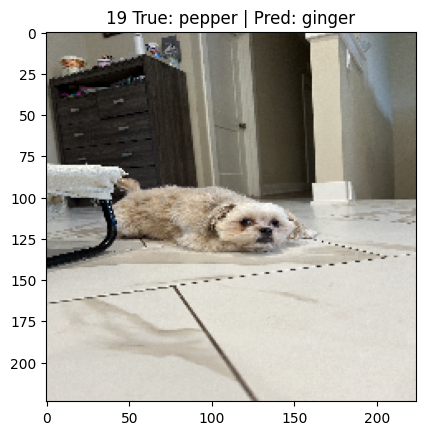

In [34]:
print(len(incorrect_predictions))

for idx in incorrect_predictions:
    # Get the image filename and label
    img_path = os.path.join(test_generator.directory, test_generator.filenames[idx])
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust to your image size
    true_label = y_true[idx]
    predicted_label = y_pred_classes[idx]
    
    # Print image, true label, and predicted label
    plt.imshow(img)
    plt.title(f"{idx+1} True: {class_names[true_label]} | Pred: {class_names[predicted_label]}")
    plt.show()